### CNN Implementation 

#### Part 1 Implement and train a VGG11 net on the MNIST dataset



In [1]:
import numpy as np
import keras
from keras.datasets import mnist 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [2]:
def resizing(mnist):
     train_data = []
     for img in mnist:
            resized_img = cv2.resize(img, (32, 32))
            train_data.append(resized_img)
     return train_data
newX_train = np.array(resizing(X_train))
newX_test = np.array(resizing(X_test))

In [3]:
from keras import backend
if keras.backend.image_data_format() == 'channels_first':
  newX_train = newX_train.reshape(len(newX_train), 1, 32, 32)
  newX_test = newX_test.reshape(len(newX_test), 1, 32, 32)
  input_shape = (1, 32, 32)
else:
  newX_train = newX_train.reshape(len(newX_train), 32, 32, 1)
  newX_test = newX_test.reshape(len(newX_test), 32, 32, 1)
  input_shape = (32, 32, 1)

In [4]:
from keras.utils import np_utils
newX_train = newX_train.astype('float32')
newX_train /= 255
newX_test = newX_test.astype('float32')
newX_test /= 255
Y_train = keras.utils.np_utils.to_categorical(Y_train, 10)
Y_test = keras.utils.np_utils.to_categorical(Y_test, 10)

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten 
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Flatten()) 
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)         5

In [6]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [7]:
history = model.fit(newX_train[:6000], Y_train[:6000], batch_size=32, validation_data=(newX_test[:1000],Y_test[:1000]), epochs=10, verbose=1)
model.evaluate(newX_test[:1000], Y_test[:1000], batch_size=32)

Epoch 1/10
188/188 [==============================] - 415s 2s/step - loss: 2.3008 - accuracy: 0.1127 - val_loss: 2.2964 - val_accuracy: 0.1560
Epoch 2/10
188/188 [==============================] - 437s 2s/step - loss: 1.9827 - accuracy: 0.2945 - val_loss: 1.0259 - val_accuracy: 0.6380
Epoch 3/10
188/188 [==============================] - 415s 2s/step - loss: 0.4924 - accuracy: 0.8400 - val_loss: 0.3310 - val_accuracy: 0.9110
Epoch 4/10
188/188 [==============================] - 410s 2s/step - loss: 0.2006 - accuracy: 0.9410 - val_loss: 0.2103 - val_accuracy: 0.9370
Epoch 5/10
188/188 [==============================] - 406s 2s/step - loss: 0.1286 - accuracy: 0.9660 - val_loss: 0.2151 - val_accuracy: 0.9370
Epoch 6/10
188/188 [==============================] - 399s 2s/step - loss: 0.1023 - accuracy: 0.9690 - val_loss: 0.2247 - val_accuracy: 0.9400
Epoch 7/10
188/188 [==============================] - 412s 2s/step - loss: 0.0759 - accuracy: 0.9772 - val_loss: 0.1989 - val_accuracy: 0.9510

[0.16195669770240784, 0.9559999704360962]

In [8]:
model.evaluate(newX_test[:1000], Y_test[:1000], batch_size=32)

32/32 [==============================] - 7s 207ms/step - loss: 0.1620 - accuracy: 0.9560


[0.16195669770240784, 0.9559999704360962]

#### Part 2 Inspect the training process

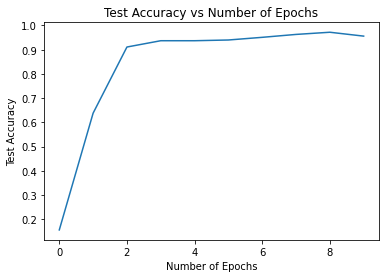

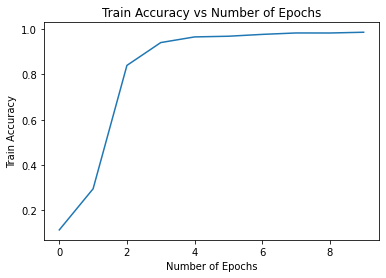

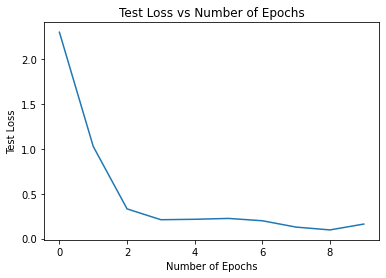

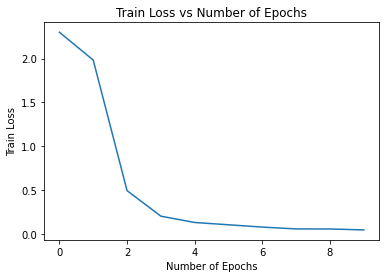

In [11]:
# (i) test accuracy vs the number of epochs (say 3 ∼ 5)
plt.plot(history.history['val_accuracy'])
plt.title('Test Accuracy vs Number of Epochs')
plt.ylabel('Test Accuracy')
plt.xlabel('Number of Epochs')
plt.show()
# (ii) training accuracy vs the number of epochs
plt.plot(history.history['accuracy'])
plt.title('Train Accuracy vs Number of Epochs')
plt.ylabel('Train Accuracy')
plt.xlabel('Number of Epochs')
plt.show()
# (iii) test loss vs the number of epochs
plt.plot(history.history['val_loss'])
plt.title('Test Loss vs Number of Epochs')
plt.ylabel('Test Loss')
plt.xlabel('Number of Epochs')
plt.show()
# (iv) training loss vs the number of epochs
plt.plot(history.history['loss'])
plt.title('Train Loss vs Number of Epochs')
plt.ylabel('Train Loss')
plt.xlabel('Number of Epochs')
plt.show()